## 非极大值抑制

在进行目标检测过程中，我们的分类器会对每一个滑动窗口的内容进行分类，而滑动窗口是按照设定的步长在图像金字塔的每个图层中从上到下、从左向右移动，**这样一个目标就会出现在多个滑动窗口中**。
最后我们就会获得多个相交、重叠的矩形框。
如下图在目标检测过程中目标上会产生多个矩形框，我们**希望从这些矩形框中挑选出一个最合适的矩形框且剔除多余的矩形框，使得每个目标只被一个矩形框标记**。

![](../dataset/5_nonMaximumSuppression/非极大值抑制的作用_例子1.jpg)

In [1]:
import numpy as np
import cv2

In [2]:
def NMS(boxes, threshold):
    """[summary]

    Args:
        boxes ([type]): 目标检测过程中获得的所有矩形框
        threshold ([type]): 事先定义的一个阈值，当两个矩形框重叠的面积超过这个阈值时我们将剔除其中一个矩形框

    Returns:
        [type]: [description]
    """
    if len(boxes) == 0:
        return []
    
    boxes = np.array(boxes).astype("float")

    x1 = boxes[:,0] # 矩形框左上角顶点的横坐标
    y1 = boxes[:,1] # 矩形框左上角顶点的纵坐标
    w1 = boxes[:,2] # 矩形框的宽
    h1 = boxes[:,3] # 矩形框的高
    x2 = x1 + w1 # 矩形框右下角的横坐标
    y2 = y1 + h1 # 矩形框右下角的纵坐标
    
    area = (w1 + 1) * (h1 + 1) # 计算矩形框的面积
    temp = []
    
    idxs = np.argsort(h1)
    
    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        temp.append(i)   
        
        x1_m = np.maximum(x1[i], x1[idxs[:last]]) # 将 x1[i] 与 boxes 中其他矩形框的左上角横坐标两两比较
        y1_m = np.maximum(y1[i], y1[idxs[:last]])
        
        x2_m = np.minimum(x2[i], x2[idxs[:last]]) # x2[i] 与 boxes 中其他矩形框的右下角横坐标两两比较
        y2_m = np.minimum(y2[i], y2[idxs[:last]])
        
        w = np.maximum(0, x2_m - x1_m + 1)
        h = np.maximum(0, y2_m - y1_m + 1)
        
        over = (w * h) / area[idxs[:last]] # 计算重叠面积的比值
        
        idxs = np.delete(idxs, np.concatenate(([last],  
            np.where(over > threshold)[0])))  

    return boxes[temp].astype("int")

In [3]:
from hog_detection import run

d:\ML_Practice\2021_07_12\5_非极大值抑制\hog_detection.py:57: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if h is 0 or w is 0:
d:\ML_Practice\2021_07_12\5_非极大值抑制\hog_detection.py:57: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if h is 0 or w is 0:


In [4]:
img_path = "../dataset/5_nonMaximumSuppression/test_image/man.jpg"
model_path = '../dataset/5_nonMaximumSuppression/model'
roi_loc, image = run(img_path=img_path, model_path=model_path)

In [5]:
print(roi_loc)

[[140, 160, 64, 128], [200, 160, 64, 128], [160, 180, 64, 128], [180, 280, 64, 128], [220, 320, 64, 128], [180, 120, 96, 192], [150, 150, 96, 192], [135, 135, 144, 288]]


In [6]:
for (x, y, w, h) in NMS(roi_loc, threshold=0.3):
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

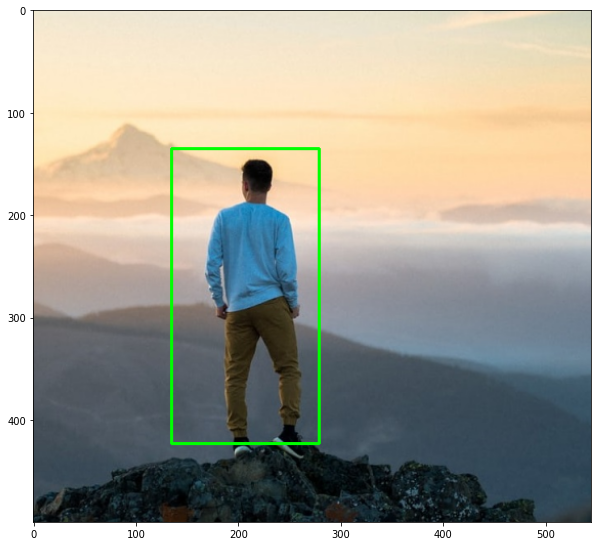

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,10))
image = image[:,:,::-1]
plt.imshow(image)